# CS273P Final Project

### Group 13: Connor McManigal, Peyton Politewicz, Harold Hin Ng

### Import Libraries and Read in the Data

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import sklearn
from collections import Counter
import re

In [2]:
df = pd.read_csv("/Users/connormcmanigal/Desktop/CS273P/Final Project/Data/Recipe Reviews and User Feedback Dataset.csv")
df = pd.DataFrame(df)

## Data Cleaning

In [3]:
# Check dataframe shape
df.shape

(18182, 15)

In [4]:
# Drop unneccessary column and check dataframe
df.drop(columns=['Unnamed: 0'], inplace = True)
df = df.dropna()
df.head()

,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text
0,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2G3aneMRgRMZwXqIHmSdXSG1hEM,u_9iFLIhMa8QaG,Jeri326,1,1665619889,0,0,0,5,527,"I tweaked it a little, removed onions because ..."
1,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FsPC83HtzCsQAtOxlbL6RcaPbY,u_Lu6p25tmE77j,Mark467,50,1665277687,0,7,0,5,724,Bush used to have a white chili bean and it ma...
2,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FPrSGyTv7PQkZq37j92r9mYGkP,u_s0LwgpZ8Jsqq,Barbara566,10,1664404557,0,3,0,5,710,I have a very complicated white chicken chili ...
3,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DzdSIgV9qNiuBaLoZ7JQaartoC,u_fqrybAdYjgjG,jeansch123,1,1661787808,2,2,0,0,581,"In your introduction, you mentioned cream chee..."
4,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DtZJuRQYeTFwXBoZRfRhBPEXjI,u_XXWKwVhKZD69,camper77,10,1664913823,1,7,0,0,820,Wonderful! I made this for a &#34;Chili/Stew&#...


In [5]:
df.shape

(18180, 14)

In [7]:
# Change unix time to date time
df['created_at'] = pd.to_datetime(df['created_at'], unit = 's')

# Check time('created_at') changes and look at unique values
df['created_at'].unique() # returns 2695 unique timestamps

<DatetimeArray>
['2022-10-13 00:11:29', '2022-10-09 01:08:07', '2022-09-28 22:35:57',
 '2022-08-29 15:43:28', '2022-10-04 20:03:43', '2022-08-24 15:19:11',
 '2022-02-05 19:20:05', '2022-02-04 02:35:14', '2022-02-04 00:05:24',
 '2022-01-26 22:57:19',
 ...
 '2022-05-09 18:14:14', '2022-04-08 07:21:21', '2022-03-21 12:27:35',
 '2022-02-11 05:02:10', '2022-02-01 04:29:27', '2022-02-23 22:41:52',
 '2021-08-08 21:44:22', '2021-06-02 15:48:18', '2021-02-11 14:06:47',
 '2021-02-11 09:45:20']
Length: 2695, dtype: datetime64[ns]

In [97]:
df.head()

,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text
0,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2G3aneMRgRMZwXqIHmSdXSG1hEM,u_9iFLIhMa8QaG,Jeri326,1,2022-10-13 00:11:29,0,0,0,5,527,"I tweaked it a little, removed onions because ..."
1,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FsPC83HtzCsQAtOxlbL6RcaPbY,u_Lu6p25tmE77j,Mark467,50,2022-10-09 01:08:07,0,7,0,5,724,Bush used to have a white chili bean and it ma...
2,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FPrSGyTv7PQkZq37j92r9mYGkP,u_s0LwgpZ8Jsqq,Barbara566,10,2022-09-28 22:35:57,0,3,0,5,710,I have a very complicated white chicken chili ...
3,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DzdSIgV9qNiuBaLoZ7JQaartoC,u_fqrybAdYjgjG,jeansch123,1,2022-08-29 15:43:28,2,2,0,0,581,"In your introduction, you mentioned cream chee..."
4,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DtZJuRQYeTFwXBoZRfRhBPEXjI,u_XXWKwVhKZD69,camper77,10,2022-10-04 20:03:43,1,7,0,0,820,Wonderful! I made this for a &#34;Chili/Stew&#...


## Exploratory Data Analysis

In [9]:
# Check time range of recipe reviews
min = df['created_at'].min()
max = df['created_at'].max()
print(f'Recipe reviews are from "{min}" to "{max}"')

Recipe reviews are from "2021-02-11 09:22:16" to "2022-10-14 14:00:35"


In [10]:
# Find reviews with references
reference_text = df[df['text'].str.contains('&#')]
print(f"{reference_text.shape[0]} reviews reference other previous reviews denoted with '&#'")

6336 reviews reference other previous reviews denoted with '&#'


In [11]:
# Take look at some of the reviews ('text')
df['text'].head()

0    I tweaked it a little, removed onions because ...
1    Bush used to have a white chili bean and it ma...
2    I have a very complicated white chicken chili ...
3    In your introduction, you mentioned cream chee...
4    Wonderful! I made this for a &#34;Chili/Stew&#...
Name: text, dtype: object

In [18]:
# Find min and max length of characters in text
min_length = np.inf
max_length = -np.inf

for text in df['text']:
    text_length = len(text)
    if text_length < min_length:
        min_length = text_length
    if text_length > max_length:
        max_length = text_length

print("Minimum length of characters:", min_length)
print("Maximum length of characters:", max_length)

Minimum length of characters: 1
Maximum length of characters: 2742


In [23]:
# Which texts have length 1?
texts_length_1 = []

for index, text in enumerate(df['text']):
    if len(text) == 1:
        texts_length_1.append((index, text))

if texts_length_1:
    print("Observations with text length of 1:")
    for index, text in texts_length_1:
        print(f"Index: {index}, Text: {text}")
else:
    print("No observations with text length of 1.")

Observations with text length of 1:
Index: 167, Text: .
Index: 252, Text: .
Index: 4282, Text: .
Index: 6014, Text: .
Index: 7556, Text: !
Index: 10048, Text:  
Index: 15047, Text:  
Index: 16062, Text: .


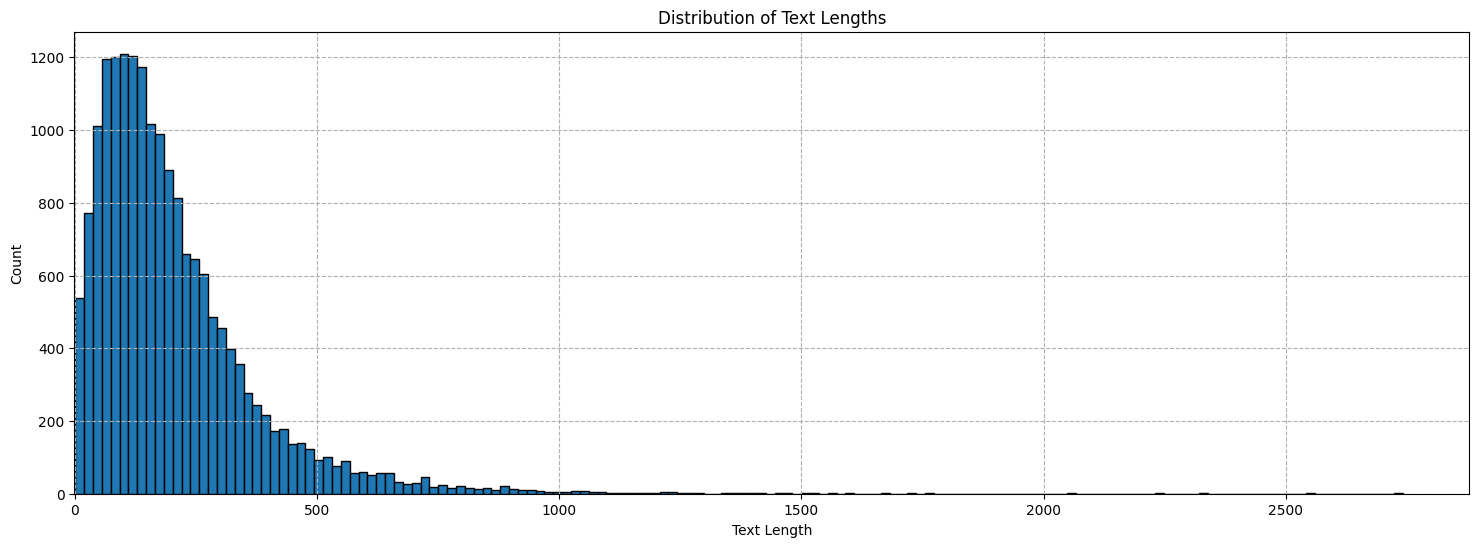

In [90]:
# Plot distribution of text lengths
text_lengths = df['text'].apply(len)

plt.figure(figsize=(18, 6))
plt.hist(text_lengths, bins=150, edgecolor = 'black')
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.xlim(-1)
plt.grid(True, linestyle='--', zorder=1)
plt.show()

In [47]:
# Find 100 most frequent words

all_text = ' '.join(df['text'])
words = re.findall(r'\b\w+\b', all_text.lower())

word_counts = Counter(words)
top_100 = word_counts.most_common(100)
top_100_df = pd.DataFrame(top_100, columns=['Word','Frequency'])

print(top_100_df)

        Word  Frequency
0          i      33614
1        the      29319
2        and      24188
3         it      21929
4          a      17131
..       ...        ...
95       cup       1222
96      from       1218
97      even       1187
98        an       1151
99  everyone       1148

[100 rows x 2 columns]


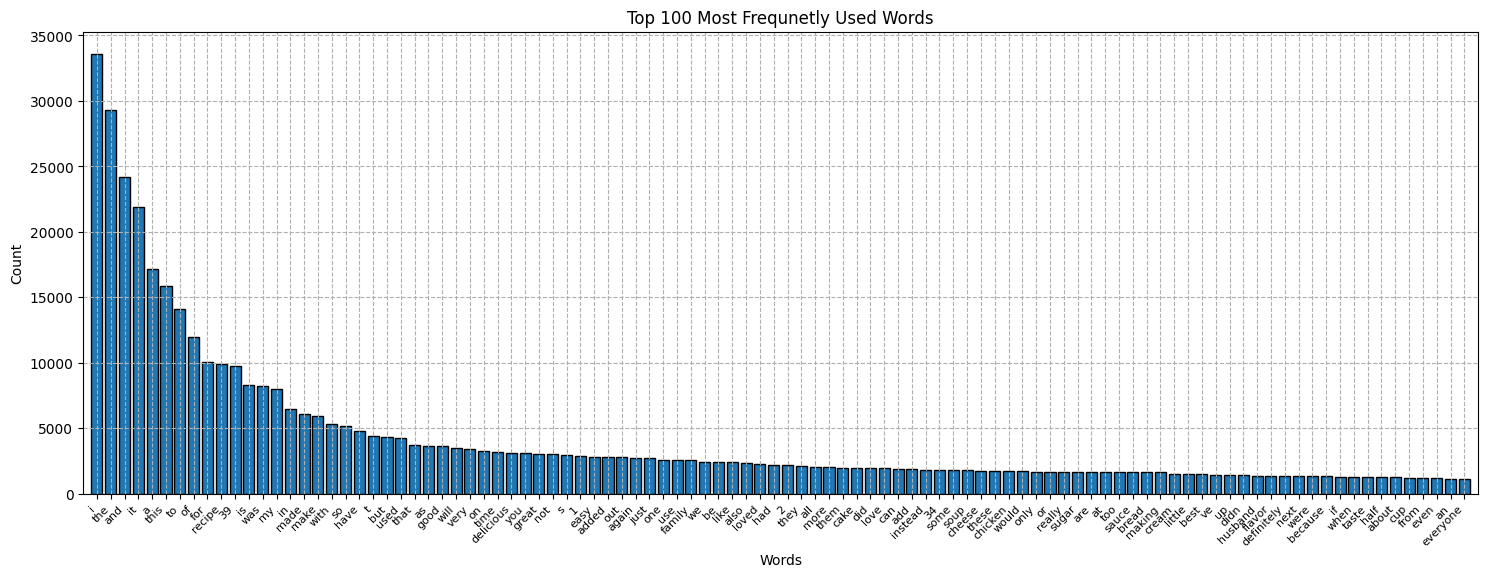

In [94]:
# Plot 100 most frequent words
top_100_words = dict(word_counts.most_common(100))
x = np.arange(len(top_100_words))

plt.figure(figsize=(18, 6))
plt.bar(x, top_100_words.values(), edgecolor = 'black')
plt.title('Top 100 Most Frequnetly Used Words')
plt.xlabel('Words')
plt.ylabel('Count')
plt.xticks(x, top_100_words.keys(), rotation=45, ha='right', fontsize=8)
plt.xlim(-1, 100)
plt.grid(True, linestyle='--', zorder=1)
plt.show()

In [65]:
# Explore descriptive statistics of user reputations
df['user_reputation'].describe()

count    18180.000000
mean         2.159736
std         10.015210
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        520.000000
Name: user_reputation, dtype: float64

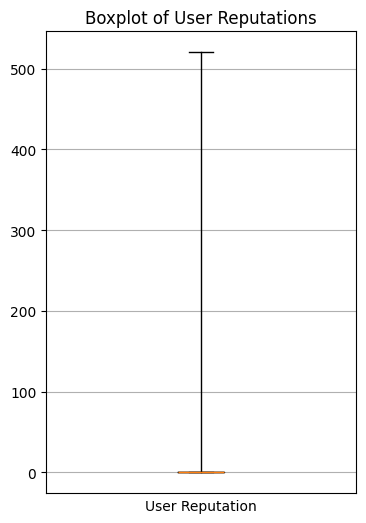

In [93]:
# Plot boxplot of user reputations
plt.figure(figsize=(4,6))
plt.boxplot(df['user_reputation'].values, whis = (0, 100))
plt.xticks([])
plt.title('Boxplot of User Reputations')
plt.xlabel('User Reputation')
plt.grid(True)
plt.show()

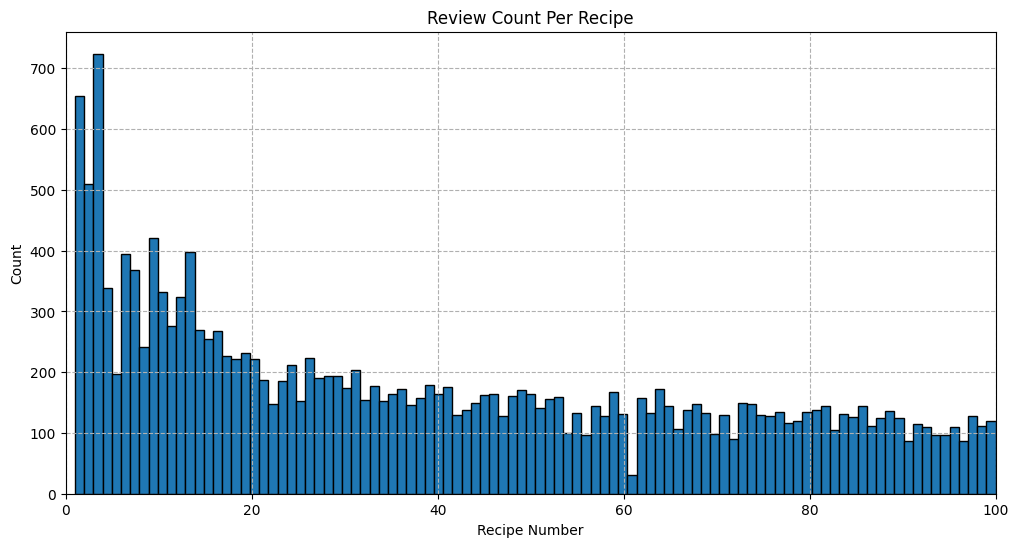

In [92]:
# Plot counts of number of reviews per recipe
plt.figure(figsize = (12,6))
plt.hist(df['recipe_number'], bins = 100, edgecolor = 'black')
plt.title('Review Count Per Recipe')
plt.xlabel('Recipe Number')
plt.ylabel('Count')
plt.xlim(0,100)
plt.grid(True, linestyle='--', zorder=0)
plt.show()

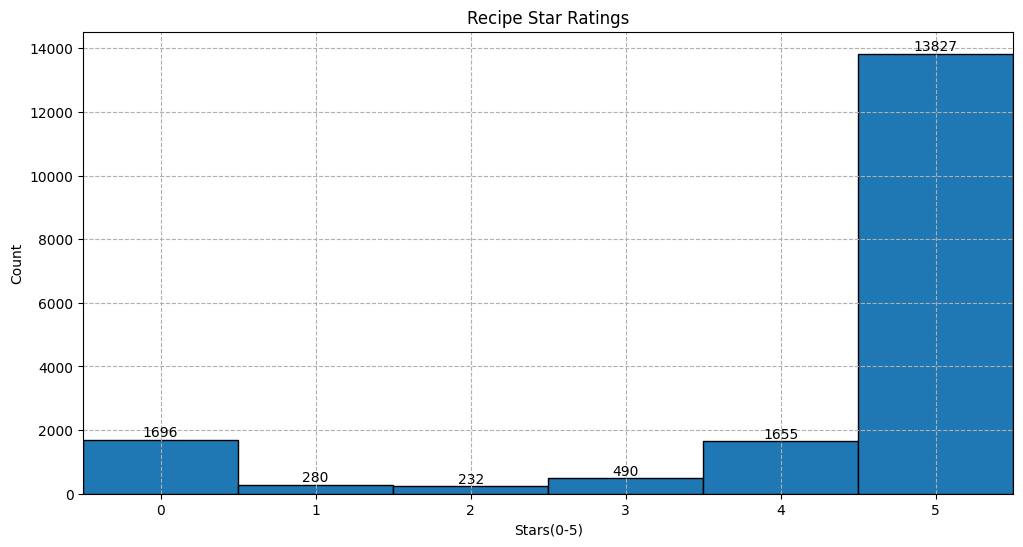

In [87]:
# Check distribution of recipe star ratings
bin_edges = np.arange(-0.5, 6.5, 1)

plt.figure(figsize=(12,6))
counts, bins, _ = plt.hist(df['stars'], bins = bin_edges, edgecolor = 'black', zorder=0)

# Add annotations at the top of each bin
for count, bin_edge in zip(counts, bins[:-1]):
    plt.text(bin_edge + 0.5, count, str(int(count)), ha='center', va='bottom')

plt.title('Recipe Star Ratings')
plt.xlabel('Stars(0-5)')
plt.ylabel('Count')
plt.xlim(-0.5,5.5)
plt.grid(True, linestyle='--', zorder=1)
plt.show()

In [105]:
df[df['user_name'] == 'Mark467']

,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text
1,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FsPC83HtzCsQAtOxlbL6RcaPbY,u_Lu6p25tmE77j,Mark467,50,2022-10-09 01:08:07,0,7,0,5,724,Bush used to have a white chili bean and it ma...
